In [1]:
# Code Cell 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# The following allows your Jupyter notebook to create plots inside a cell
%matplotlib inline

In [2]:
# Code Cell 2

# Import the file, stores-dist.csv
salesDist = pd.read_csv('./data/stores-dist.csv')

# Verify the imported data
salesDist.head()

,district,annual net sales,number of stores in district
0,1,231.0,12
1,2,156.0,13
2,3,10.0,16
3,4,519.0,2
4,5,437.0,6


In [3]:
# Code Cell 3
# The district column has no relevance at this time, so it can be dropped.
salesDist = salesDist.rename(columns={'annual net sales':'sales','number of stores in district':'stores'})
salesDist.head()

,district,sales,stores
0,1,231.0,12
1,2,156.0,13
2,3,10.0,16
3,4,519.0,2
4,5,437.0,6


In [4]:
# Code Cell 4-1
# Check correlation of data prior to doing the analysis
# # Hint: check lab 3.1.5.5

# SOLUTION
# Are these variables correlated?
df_corr = salesDist.corr()
df_corr

,district,sales,stores
district,1.000000,0.136103,-0.230617
sales,0.136103,1.000000,-0.912236
stores,-0.230617,-0.912236,1.000000


In [5]:
# Code Cell 4-2
corr = df_corr.values
print('Correlation coefficient between district and sales: {}'.format(corr[0, 1]))
print('Correlation coefficient between district and stores: {}'.format(corr[0, 2]))
print('Correlation coefficient between sales and stores: {}'.format(corr[1, 2]))

Correlation coefficient between district and sales: 0.13610270343148242
Correlation coefficient between district and stores: -0.23061651880472378
Correlation coefficient between sales and stores: -0.9122363921094577


In [6]:
# Code Cell 5
# The district column has no relevance at this time, so it can be dropped.
#sales = salesDist.drop(...)

# SOLUTION
sales = salesDist
sales.drop(['district'], axis=1, inplace=True)
sales.head()

,sales,stores
0,231.0,12
1,156.0,13
2,10.0,16
3,519.0,2
4,437.0,6


In [7]:
# Code Cell 6
# Dependent variable for y axis
y = sales['sales']
# Independent variable for x axis
X = sales.stores

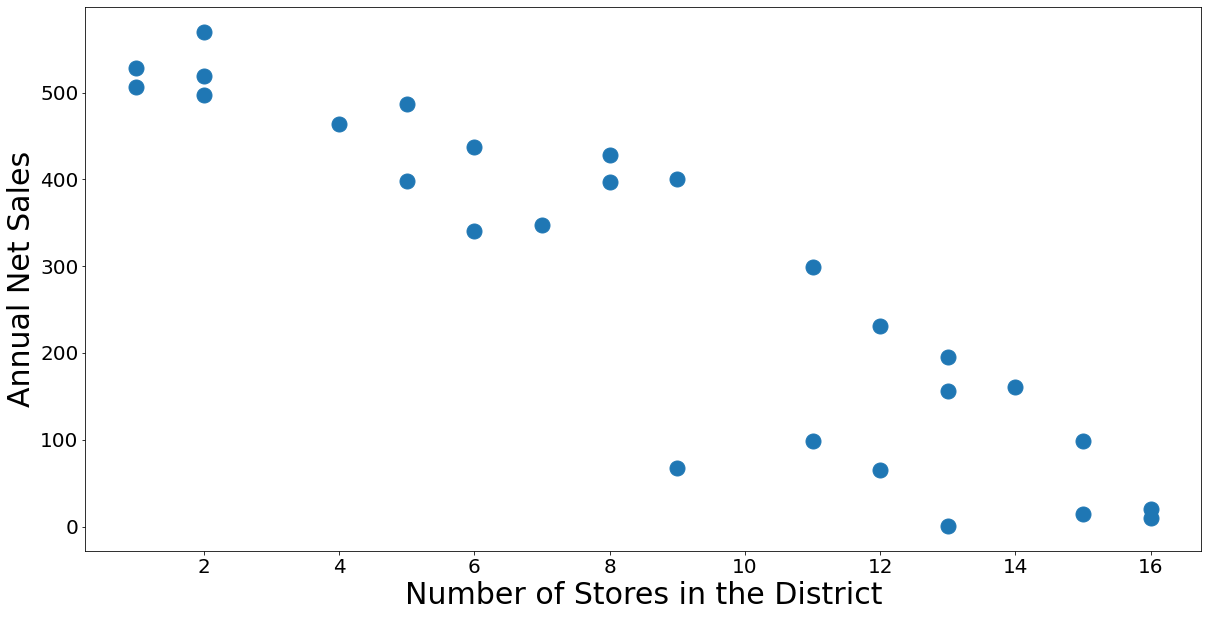

In [8]:
# Code Cell 7
# Display the plot inline
%matplotlib inline

# Increase the size of the plot
plt.figure(figsize=(20, 10))

# Create a scatter plot: Number of stores in the District vs. Annual Net Sales
plt.plot(X,y, 'o', markersize = 15)

# Add axis labels and increase the font size
plt.ylabel('Annual Net Sales', fontsize = 30)
plt.xlabel('Number of Stores in the District', fontsize = 30)

# Increase the font size on the ticks on the x and y axis
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# Display the scatter plot
plt.show()

In [9]:
# Code Cell 8
# Use numpy polyfit for linear regression to fit the data
# Generate the slope of the line (m)
# Generate the y-intercept (b)
m, b = np.polyfit(X, y, 1) 
print ('The slope of line is {:.2f}.'.format(m))
print ('The y-intercept is {:.2f}.'.format(b))
print ('The best fit simple linear regression line is {:.2f}x + {:.2f}.'.format(m, b))

The slope of line is -35.79.
The y-intercept is 599.38.
The best fit simple linear regression line is -35.79x + 599.38.


In [10]:
# Code Cell 9
# y coordinate for centroid
y_mean = y.mean()    
# x coordinate for centroid
x_mean = X.mean()
print ('The centroid for this dataset is X = {:.2f} and y = {:.2f}.'.format(x_mean, y_mean))

The centroid for this dataset is X = 8.74 and y = 286.57.


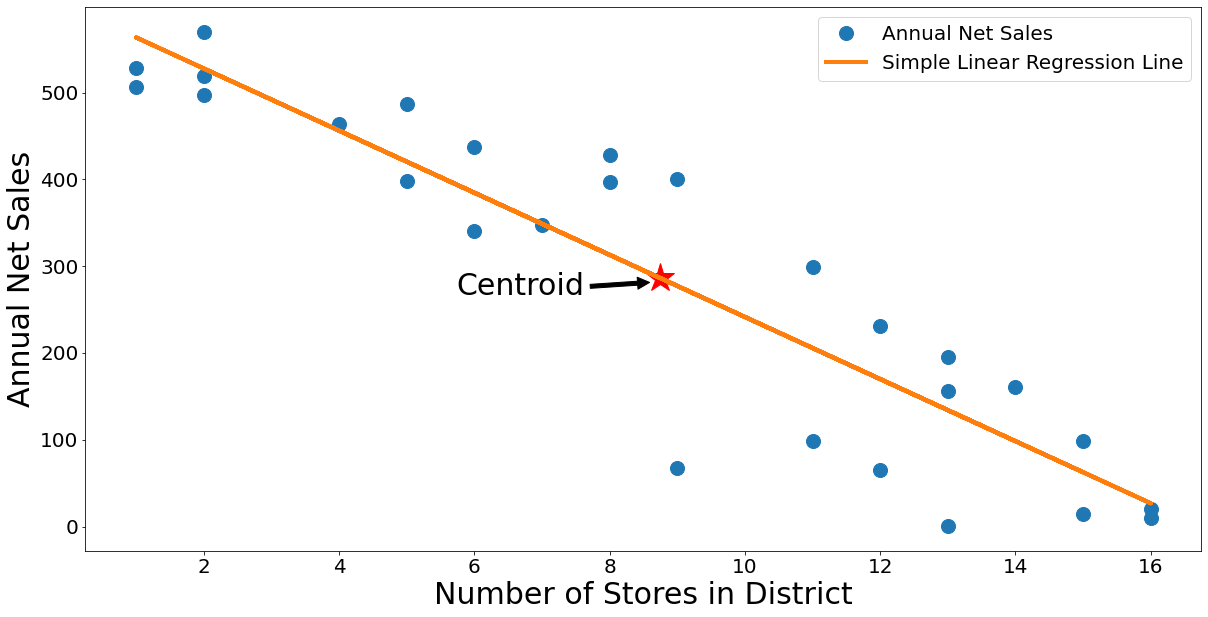

In [11]:
# Code Cell 10
# Create the plot inline
%matplotlib inline

# Enlarge the plot size
plt.figure(figsize=(20,10))

# Plot the scatter plot of the data set
plt.plot(X, y, 'o', markersize = 14, label = "Annual Net Sales") 

# Plot the centroid point
plt.plot(x_mean, y_mean, '*', markersize = 30, color = "r") 

# Plot the linear regression line
plt.plot(X, m*X + b, '-', label = 'Simple Linear Regression Line', linewidth = 4)

# Create the x and y axis labels
plt.ylabel('Annual Net Sales', fontsize = 30)
plt.xlabel('Number of Stores in District', fontsize = 30)

# Enlarge x and y tick marks
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# Point out the centroid point in the plot
plt.annotate('Centroid', xy=(x_mean-0.1, y_mean-5), xytext=(x_mean-3, y_mean-20), arrowprops=dict(facecolor='black', shrink=0.05), fontsize = 30)

# Create legend
plt.legend(loc = 'upper right', fontsize = 20)

In [12]:
# Code Cell 11
# Function to predict the net sales from the regression line
def predict(query):
    if query >= 1:
        predict = m * query + b
        return predict
    else:
        print ("You must have at least 1 store in the district to predict the annual net sales.")

In [13]:
# Code Cell 12
# Enter the number of stores in the function to generate the net sales prediction.

# SOLUTION
pred = predict(49)
print ('The prediction for a total of 49 stores in the district is {:.2f}'.format(pred))

The prediction for a total of 49 stores in the district is -1154.19
